# Rate of superinfection

The rate of superinfection $\chi$, also known as the crossing rate of transmission chains, is one of the key parameters of the [genomic transmission graph](https://d-kwiat.github.io/gtg/basic-model.html). 

Here we examine the relationship between $\chi$ and the inbreeding coefficient $F_{WS}$, which can be measured by deep sequencing of parasites taken from malaria-infected individuals since

![fws](fws.png)

where $\widehat{H}_W$ is mean within-host heterozygosity and $H_S$ is the heterozygosity of the subpopulation.  Here we examine the relationship between $\chi$ and $F_{WS}$ using two different  methods.  In both cases we estimate $F_{WS}$ for various combinations of transmission parameters and then plot the relationship with $\chi$.

Our first method is to estimate times to coalescence by Markov chain simulation and then to estimate levels of heterozygosity within-host and in the subpopulation.  We can do this using the `get_coalescent()` and `get_diversity()` functions in `coalestr`.  This automatically calculates $F_{WS}$ and returns it as an attribute of the population.

Our second method is to use the formula derived in the accompanying paper (link TBD)

![hwhs](hwhs.png)

$\lambda$ is very small so for most practical purposes we can say that $F_{WS} = 1 - \kappa$.

We then plot the results of both methods on the same graph to compare the results. It is apparent that the two methods give essentially identical results $N_h$ is large (~1000), and are fairly close when $N_h$ is in the region of 100, but that they deviate significantly when $N_h$ is in the region of 30 or below.

In [ ]:
!pip install coalestr

from coalestr import cs
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt
import coalestr as cs

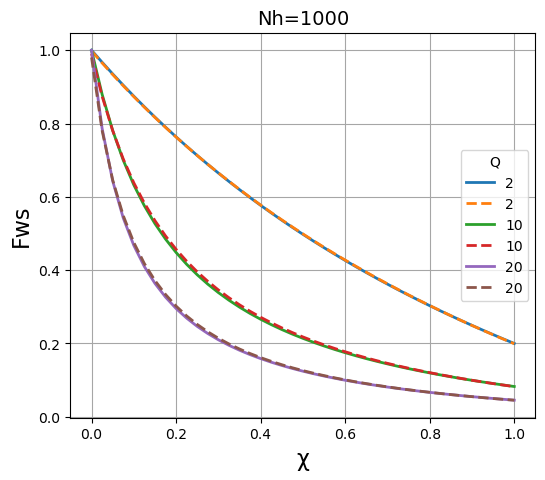

In [4]:
mu = 1.1e-8 # Mutation rate
duration = 10000
N = 1000

X_list = [x/40 for x in range(41)] # values of chi to estimate
Q_list = [2, 10, 20]

plt.figure(figsize = (6,5))

for Q in Q_list:
    
    alpha = (1 - 1 / Q) * (1 - 2 * mu) 
    fws_formula = []
    fws_simulation = []
    X_plot = []

    for X in X_list:
        
        # get result by simulation
        history = [[duration, N, Q, X, 0]]
        pop = cs.Population(history)
        pop.get_coalescent(show = False)
        pop.get_diversity(show = False)
        fws_simulation_result = pop.diversity[0, 5]
        fws_simulation.append(fws_simulation_result)
        
        # get result by formula
        sum1 = 0
        sum2 = X
        for i in range(1,10000):
            sum1 += Q * X * (1 - X) ** (i - 1) / ( 2 * Q - (Q - 1) * alpha ** i - 1)
            sum2 += X * (1 - X) ** i * alpha ** i
        fws_formula_result = 1 - sum1 * sum2
        fws_formula.append(fws_formula_result)
 
    plt.plot(X_list, fws_formula, linewidth=2, label=Q)
    plt.plot(X_list, fws_simulation, linestyle = 'dashed', linewidth=2, label=Q)
    
plt.title("Nh=" + str(N), fontsize=14)
plt.xlabel("\u03C7", fontsize=16)
plt.ylabel("Fws", fontsize=16)
plt.grid(visible=True, which='both', color='0.65', linestyle='-')
plt.legend(title="Q", frameon=True,loc=7) 

plt.show()

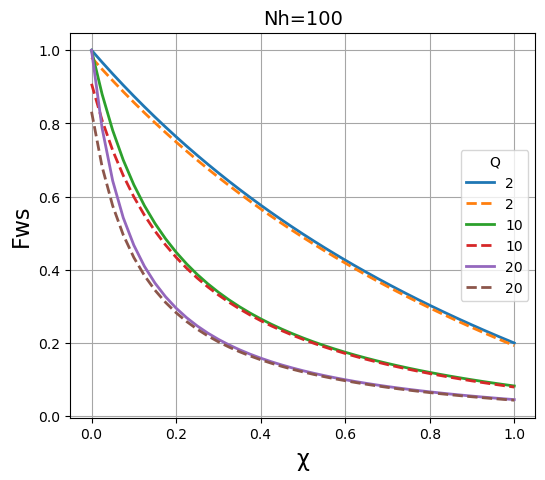

In [5]:
duration = 10000
N = 100

X_list = [x/40 for x in range(41)] # values of chi to estimate
Q_list = [2, 10, 20]

plt.figure(figsize = (6,5))

for Q in Q_list:
       
    alpha = (1 - 1 / Q) * (1 - 2 * mu) 
    fws_formula = []
    fws_simulation = []
    X_plot = []

    for X in X_list:
        
        # get result by simulation
        history = [[duration, N, Q, X, 0]]
        pop = cs.Population(history)
        pop.get_coalescent(show = False)
        pop.get_diversity(show = False)
        fws_simulation_result = pop.diversity[0, 5]
        fws_simulation.append(fws_simulation_result)
        
        # get result by formula
        sum1 = 0
        sum2 = X
        for i in range(1,10000):
            sum1 += Q * X * (1 - X) ** (i - 1) / ( 2 * Q - (Q - 1) * alpha ** i - 1)
            sum2 += X * (1 - X) ** i * alpha ** i
        fws_formula_result = 1 - sum1 * sum2
        fws_formula.append(fws_formula_result)
 
    plt.plot(X_list, fws_formula, linewidth=2, label=Q)
    plt.plot(X_list, fws_simulation, linestyle = 'dashed', linewidth=2, label=Q)
    
plt.title("Nh=" + str(N), fontsize=14)
plt.xlabel("\u03C7", fontsize=16)
plt.ylabel("Fws", fontsize=16)
plt.grid(visible=True, which='both', color='0.65', linestyle='-')
plt.legend(title="Q", frameon=True,loc=7) 

plt.show()

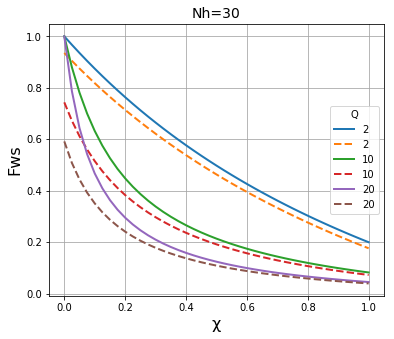

In [4]:
duration = 10000
N = 30

X_list = [x/40 for x in range(41)] # values of chi to estimate
Q_list = [2, 10, 20]

plt.figure(figsize = (6,5))

for Q in Q_list:
       
    alpha = (1 - 1 / Q) * (1 - 2 * mu) 
    fws_formula = [] 
    fws_simulation = []
    X_plot = []

    for X in X_list:
        
        # get result by simulation
        history = [[duration, N, Q, X, 0]]
        pop = cs.Population(history)
        pop.get_coalescent(show = False)
        pop.get_diversity(show = False)
        fws_simulation_result = pop.diversity[0, 5]
        fws_simulation.append(fws_simulation_result)
        
        # get result by formula
        sum1 = 0
        sum2 = X
        for i in range(1,10000):
            sum1 += Q * X * (1 - X) ** (i - 1) / ( 2 * Q - (Q - 1) * alpha ** i - 1)
            sum2 += X * (1 - X) ** i * alpha ** i
        fws_formula_result = 1 - sum1 * sum2
        fws_formula.append(fws_formula_result)
 
    plt.plot(X_list, fws_formula, linewidth=2, label=Q)
    plt.plot(X_list, fws_simulation, linestyle = 'dashed', linewidth=2, label=Q)
    
plt.title("Nh=" + str(N), fontsize=14)
plt.xlabel("\u03C7", fontsize=16)
plt.ylabel("Fws", fontsize=16)
plt.grid(visible=True, which='both', color='0.65', linestyle='-')
plt.legend(title="Q", frameon=True,loc=7) 

plt.show()

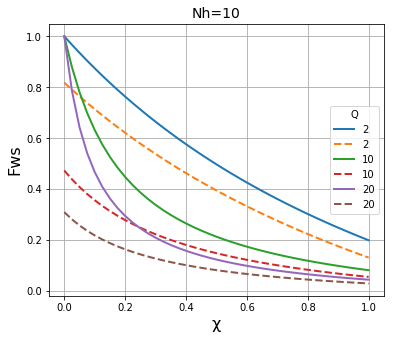

In [5]:
duration = 10000
N = 10

X_list = [x/40 for x in range(41)] # values of chi to estimate
Q_list = [2, 10, 20]

plt.figure(figsize = (6,5))

for Q in Q_list:
    
    alpha = (1 - 1 / Q) * (1 - 2 * mu) 
    fws_formula = []
    fws_simulation = []
    X_plot = []

    for X in X_list:
        
        # get result by simulation
        history = [[duration, N, Q, X, 0]]
        pop = cs.Population(history)
        pop.get_coalescent(show = False)
        pop.get_diversity(show = False)
        fws_simulation_result = pop.diversity[0, 5]
        fws_simulation.append(fws_simulation_result)
        
        # get result by formula
        sum1 = 0
        sum2 = X
        for i in range(1,10000):
            sum1 += Q * X * (1 - X) ** (i - 1) / ( 2 * Q - (Q - 1) * alpha ** i - 1)
            sum2 += X * (1 - X) ** i * alpha ** i
        fws_formula_result = 1 - sum1 * sum2
        fws_formula.append(fws_formula_result)
 
    plt.plot(X_list, fws_formula, linewidth=2, label=Q)
    plt.plot(X_list, fws_simulation, linestyle = 'dashed', linewidth=2, label=Q)
    
plt.title("Nh=" + str(N), fontsize=14)
plt.xlabel("\u03C7", fontsize=16)
plt.ylabel("Fws", fontsize=16)
plt.grid(visible=True, which='both', color='0.65', linestyle='-')
plt.legend(title="Q", frameon=True,loc=7) 

plt.show()

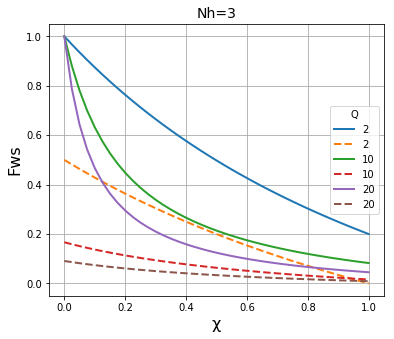

In [6]:
duration = 10000
N = 3

X_list = [x/40 for x in range(41)] # values of chi to estimate
Q_list = [2, 10, 20]

plt.figure(figsize = (6,5))

for Q in Q_list:
    
    alpha = (1 - 1 / Q) * (1 - 2 * mu) 
    fws_formula = []
    fws_simulation = []
    X_plot = []

    for X in X_list:
        
        # get result by simulation
        history = [[duration, N, Q, X, 0]]
        pop = cs.Population(history)
        pop.get_coalescent(show = False)
        pop.get_diversity(show = False)
        fws_simulation_result = pop.diversity[0, 5]
        fws_simulation.append(fws_simulation_result)
        
        # get result by formula
        sum1 = 0
        sum2 = X
        for i in range(1,10000):
            sum1 += Q * X * (1 - X) ** (i - 1) / ( 2 * Q - (Q - 1) * alpha ** i - 1)
            sum2 += X * (1 - X) ** i * alpha ** i
        fws_formula_result = 1 - sum1 * sum2
        fws_formula.append(fws_formula_result)
 
    plt.plot(X_list, fws_formula, linewidth=2, label=Q)
    plt.plot(X_list, fws_simulation, linestyle = 'dashed', linewidth=2, label=Q)
    
plt.title("Nh=" + str(N), fontsize=14)
plt.xlabel("\u03C7", fontsize=16)
plt.ylabel("Fws", fontsize=16)
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.legend(title="Q", frameon=True,loc=7) 

plt.show()